In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading data

### Genres of items, occupations of users

In [30]:
occups=pd.read_csv("ml-100k/u.occupation",sep="|",header=-1,encoding="latin-1")
print(len(occups))
occups.T

21


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer


In [31]:
genres=pd.read_csv("ml-100k/u.genre",sep="|",index_col=1,header=-1)
print(len(genres))
genres=genres[0]
genres


19


1
0         unknown
1          Action
2       Adventure
3       Animation
4      Children's
5          Comedy
6           Crime
7     Documentary
8           Drama
9         Fantasy
10      Film-Noir
11         Horror
12        Musical
13        Mystery
14        Romance
15         Sci-Fi
16       Thriller
17            War
18        Western
Name: 0, dtype: object

### Users

In [32]:
users=pd.read_csv("ml-100k/u.user",sep="|",header=-1,index_col=0)
print(len(users))
users.head()

943


,1,2,3,4
0,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


### Items

In [33]:
#give name to the columns
cols=["name","date","?","link"]
cols.extend(list(genres))
#cols

In [34]:
items=pd.read_csv("ml-100k/u.item",sep="|",header=-1,index_col=0,encoding="latin-1", names=cols)
print(len(items))
items

1682


,name,date,?,link,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Ratings (Training set)

In [35]:
train1=pd.read_csv("ml-100k/u1.base",sep="\t",header=-1,encoding="latin-1",names=("user","item","rating","time"),
                  # parse_dates=[3,],date_parser=datetime.fromtimestamp
                  )
train1.head()

#import sys
#sys.getsizeof(train1)
print(train1.rating.unique())
train1.describe()

[5 3 4 1 2]


,user,item,rating,time
count,80000.00000,80000.000000,80000.000000,8.000000e+04
mean,525.16570,425.705200,3.528350,8.835645e+08
std,255.94956,331.383936,1.118565,5.318611e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,334.00000,175.000000,3.000000,8.794556e+08
50%,535.00000,321.000000,4.000000,8.828441e+08
75%,744.00000,631.000000,4.000000,8.882676e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [36]:
train1.head()

,user,item,rating,time
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


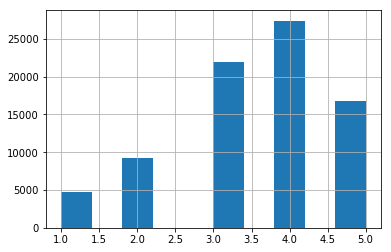

In [37]:
train1.rating.hist();

In [38]:
df=train1

### Average per user and item
I also append the average and the number of ratings to user and item dfs

In [39]:
avg_rat_item=df.groupby("item").rating.mean()
n_rat_item=df.groupby("item").rating.count()
avg=df.rating.mean()

##this is wrong, as it includes non-zero elements
#avg_rat_item=np.array(user_item.mean(axis=0))[0,:]
#avg_rat_user=np.array(user_item.mean(axis=1))[:,0]
#users["n_ratings"]=[len(r) for r in user_item.tolil().rows]
#items["n_ratings"]=[len(r) for r in user_item.T.tolil().rows]

items["avg_rating"]=avg_rat_item
items["avg_rating-avg"]=avg_rat_item-avg
items["n_ratings"]=n_rat_item

print(items.n_ratings.sum())  #sanity check
items.sort_values(by="avg_rating",ascending=False)[["name","avg_rating","avg_rating-avg", "n_ratings"]]

80000.0


,name,avg_rating,avg_rating-avg,n_ratings
1189,Prefontaine (1997),5.000000,1.471650,2.0
1653,Entertaining Angels: The Dorothy Day Story (1996),5.000000,1.471650,1.0
1599,Someone Else's America (1995),5.000000,1.471650,1.0
1500,Santa with Muscles (1996),5.000000,1.471650,1.0
1467,"Saint of Fort Washington, The (1993)",5.000000,1.471650,2.0
1201,Marlene Dietrich: Shadow and Light (1996),5.000000,1.471650,1.0
1122,They Made Me a Criminal (1939),5.000000,1.471650,1.0
1293,Star Kid (1997),5.000000,1.471650,3.0
1449,Pather Panchali (1955),4.714286,1.185936,7.0
1367,Faust (1994),4.666667,1.138317,3.0


In [40]:
avg_rat_user=df.groupby("user").rating.mean()
n_rat_user=df.groupby("user").rating.count()

users["avg_rating"]=avg_rat_user
users["avg_rating-avg"]=avg_rat_user-avg 
users["n_ratings"]=n_rat_user

print(users.n_ratings.sum())  #sanity check
users.sort_values(by="avg_rating",ascending=False)

80000


,1,2,3,4,avg_rating,avg_rating-avg,n_ratings
0,,,,,,,
849,15,F,student,25652,4.869565,1.341215,23
688,37,F,administrator,60476,4.833333,1.304983,24
225,51,F,administrator,58202,4.800000,1.271650,15
507,18,F,writer,28450,4.724138,1.195788,58
628,13,M,none,94306,4.703704,1.175354,27
928,21,M,student,55408,4.687500,1.159150,32
118,21,M,administrator,90210,4.642857,1.114507,42
427,51,M,doctor,85258,4.583333,1.054983,24
907,25,F,other,80526,4.571429,1.043079,147


### Read test set

In [41]:
test1=pd.read_csv("ml-100k/u1.test",sep="\t",header=-1,encoding="latin-1",names=("user","item","rating","time"),
                  # parse_dates=[3,],date_parser=datetime.fromtimestamp
                  )

avg_test=test1.rating.mean()
print(avg_test)
test1.head()

3.5359


,user,item,rating,time
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198


In [42]:
df_test=test1

# Recommendation

## 1st strategy: recommend best overall items for everyone
Here I just find the movies with the highest average rating, and recommend them to everyone.

First I find the best movies

### (1a) Just rank by average rating

In [43]:
#The best n_items_rec movies
n_items_rec=10
rec_items_a=items.sort_values(by="avg_rating",ascending=False)[:n_items_rec]
rec_items_index_a=rec_items_a.index
#print(rec_items_index_a)
items.loc[rec_items_index_a][["name", "avg_rating", "n_ratings"]]

,name,avg_rating,n_ratings
1189,Prefontaine (1997),5.000000,2.0
1653,Entertaining Angels: The Dorothy Day Story (1996),5.000000,1.0
1599,Someone Else's America (1995),5.000000,1.0
1500,Santa with Muscles (1996),5.000000,1.0
1467,"Saint of Fort Washington, The (1993)",5.000000,2.0
1201,Marlene Dietrich: Shadow and Light (1996),5.000000,1.0
1122,They Made Me a Criminal (1939),5.000000,1.0
1293,Star Kid (1997),5.000000,3.0
1449,Pather Panchali (1955),4.714286,7.0
1367,Faust (1994),4.666667,3.0


These are obscure movies which got 5 by one or two users.

Let's try recommending the first 10 items of this list to the users.

In [44]:
#Example: The average rating with n_items_rec=10 suggestions per user
#here I find the recommended items in the test set
test_rec_a=df_test[df_test["item"].isin(rec_items_index_a)]
print(len(df_test),len(test_rec_a))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested items= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_a.rating.mean())
print("number of successful suggested items= ",test_rec_a.rating.count())
print("number of successful suggested items per user = ",test_rec_a.rating.count()/len(users))

20000 5
number of recommended items per users=  10
number of suggested items=  9430
mean for the successful suggested items=  4.2
number of successful suggested items=  5
number of successful suggested items per user =  0.00530222693531


The average rating is good, but I only got 5 successful recommendations out of 9430, so it is probably not a good strategy

### (1b) Rank by most viewed
Let's try with the most viewed movies.

In [45]:
n_items_rec=10
rec_items_b=items.sort_values(by="n_ratings",ascending=False)[:n_items_rec]
rec_items_index_b=rec_items_b.index
#print(rec_items_index_b)
items.loc[rec_items_index_b][["name", "avg_rating","avg_rating-avg" ,"n_ratings"]]

,name,avg_rating,avg_rating-avg,n_ratings
50,Star Wars (1977),4.359504,0.831154,484.0
181,Return of the Jedi (1983),4.011848,0.483498,422.0
258,Contact (1997),3.823383,0.295033,402.0
100,Fargo (1996),4.108861,0.580511,395.0
294,Liar Liar (1997),3.164975,-0.363375,394.0
288,Scream (1996),3.445013,-0.083337,391.0
286,"English Patient, The (1996)",3.641753,0.113403,388.0
1,Toy Story (1995),3.892950,0.364600,383.0
121,Independence Day (ID4) (1996),3.390935,-0.137415,353.0
300,Air Force One (1997),3.656250,0.127900,352.0


These are well-known movies, even though some have below-par ratings (Liar Liar, Scream, ID) 

In [46]:
test_rec_b=df_test[df_test["item"].isin(rec_items_index_b)]
print(len(df_test),len(test_rec_b))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested items= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_b.rating.mean())
print("number of successful suggested items= ",test_rec_b.rating.count())
print("number of successful suggested items per user = ",test_rec_b.rating.count()/len(users))

20000 899
number of recommended items per users=  10
number of suggested items=  9430
mean for the successful suggested items=  3.7853170189099
number of successful suggested items=  899
number of successful suggested items per user =  0.953340402969


Here I get an average of almost 1 useful recommendation per user, but with a lower average rating than before.

### (1c) Rank by total rating
Here I take total_rating as the sum of all ratings. It is a comprimise between quantity and quality

In [47]:
items["total_rating"]=df.groupby("item").rating.sum()

In [48]:
n_items_rec=10
rec_items_c=items.sort_values(by="total_rating",ascending=False)[:n_items_rec]
rec_items_index_c=rec_items_c.index
#print(rec_items_index_b)
items.loc[rec_items_index_c][["name", "avg_rating","avg_rating-avg" ,"n_ratings","total_rating"]]

,name,avg_rating,avg_rating-avg,n_ratings,total_rating
50,Star Wars (1977),4.359504,0.831154,484.0,2110.0
181,Return of the Jedi (1983),4.011848,0.483498,422.0,1693.0
100,Fargo (1996),4.108861,0.580511,395.0,1623.0
258,Contact (1997),3.823383,0.295033,402.0,1537.0
1,Toy Story (1995),3.892950,0.364600,383.0,1491.0
174,Raiders of the Lost Ark (1981),4.247093,0.718743,344.0,1461.0
127,"Godfather, The (1972)",4.258824,0.730474,340.0,1448.0
286,"English Patient, The (1996)",3.641753,0.113403,388.0,1413.0
288,Scream (1996),3.445013,-0.083337,391.0,1347.0
300,Air Force One (1997),3.656250,0.127900,352.0,1287.0


Here I get popular movies with good ratings, even though Scream, which is slightly below-par, is still in the top 10.

In [49]:
test_rec_c=df_test[df_test["item"].isin(rec_items_index_c)]
print(len(df_test),len(test_rec_c))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested items= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_c.rating.mean())
print("number of successful suggested items= ",test_rec_c.rating.count())
print("number of successful suggested items per user = ",test_rec_c.rating.count()/len(users))

20000 881
number of recommended items per users=  10
number of suggested items=  9430
mean for the successful suggested items=  3.9580022701475595
number of successful suggested items=  881
number of successful suggested items per user =  0.934252386002


So we have slightly less successful recommendations (0.93 vs 0.95 per user), but with a somewhat higher average rating (3.96 vs 3.79)

### (1d) Rank by total ranking - avg_rating
I think another good KPI could be how many users like a movie more than the average.

So: (avg_ranking(item)-avg_ranking(all items)) * n_rankings(item)

Once again, it is a comprimise between quantity and quality, but with a stress on quality.

In [50]:
items["total_rating-avg"]=items["avg_rating-avg"]*items["n_ratings"]
#items.sort_values(by="tot_rating-avg",ascending=False)[["name","avg_rating","n_ratings","tot_rating-avg" ]]

In [51]:
n_items_rec=10
rec_items_d=items.sort_values(by="total_rating-avg",ascending=False)[:n_items_rec]
rec_items_index_d=rec_items_d.index
#print(rec_items_index_b)
items.loc[rec_items_index_d][["name", "avg_rating","avg_rating-avg" ,"n_ratings","total_rating","total_rating-avg"]]

,name,avg_rating,avg_rating-avg,n_ratings,total_rating,total_rating-avg
50,Star Wars (1977),4.359504,0.831154,484.0,2110.0,402.27860
127,"Godfather, The (1972)",4.258824,0.730474,340.0,1448.0,248.36100
174,Raiders of the Lost Ark (1981),4.247093,0.718743,344.0,1461.0,247.24760
100,Fargo (1996),4.108861,0.580511,395.0,1623.0,229.30175
318,Schindler's List (1993),4.489451,0.961101,237.0,1064.0,227.78105
98,"Silence of the Lambs, The (1991)",4.286667,0.758317,300.0,1286.0,227.49500
313,Titanic (1997),4.281588,0.753238,277.0,1186.0,208.64705
181,Return of the Jedi (1983),4.011848,0.483498,422.0,1693.0,204.03630
64,"Shawshank Redemption, The (1994)",4.417040,0.888690,223.0,985.0,198.17795
172,"Empire Strikes Back, The (1980)",4.196610,0.668260,295.0,1238.0,197.13675


This way I get reasonable results for the best movies. Star Wars has really an edge here, thanks to good rating (not the highest one, though) and a lot of views. 

Schindler's List, for example, has in principle a higher rating, but less views, so it is well behind.

By construction, we do not have items below-par in the top items.

On the opposite, this way we penalize popular items below par, which end up at the end of the list):

In [52]:
items[["name", "avg_rating","avg_rating-avg" ,"n_ratings","total_rating","total_rating-avg"]].sort_values(by="total_rating-avg",ascending=False).dropna().tail(10)

,name,avg_rating,avg_rating-avg,n_ratings,total_rating,total_rating-avg
231,Batman Returns (1992),2.666667,-0.861683,114.0,304.0,-98.23190
259,George of the Jungle (1997),2.766917,-0.761433,133.0,368.0,-101.27055
748,"Saint, The (1997)",3.121094,-0.407256,256.0,799.0,-104.25760
323,Dante's Peak (1997),3.000000,-0.528350,199.0,597.0,-105.14165
243,Jungle2Jungle (1997),2.490741,-1.037609,108.0,269.0,-112.06180
289,Evita (1996),2.961905,-0.566445,210.0,622.0,-118.95350
358,Spawn (1997),2.610687,-0.917663,131.0,342.0,-120.21385
235,Mars Attacks! (1996),2.836158,-0.692192,177.0,502.0,-122.51795
678,Volcano (1997),2.847826,-0.680524,184.0,524.0,-125.21640
294,Liar Liar (1997),3.164975,-0.363375,394.0,1247.0,-143.16990


So we find Liar Liar at the bottom, while it was in the top 10 with the total number of views.

Let's try recommending:

In [53]:
test_rec_d=df_test[df_test["item"].isin(rec_items_index_d)]
print(len(df_test),len(test_rec_d))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested it§ems= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_d.rating.mean())
print("number of successful suggested items= ",test_rec_d.rating.count())
print("number of successful suggested items per user = ",test_rec_d.rating.count()/len(users))

20000 802
number of recommended items per users=  10
number of suggested it§ems=  9430
mean for the successful suggested items=  4.28428927680798
number of successful suggested items=  802
number of successful suggested items per user =  0.850477200424


Now the number of successful recommendations has dropped to 0.85 vs 0.93 per user, but the average rating has increased  from 3.96 to 4.28.

It all depends on how you want to define a good movie, so how you define your KPI (key performance indicator).

### (1a-1b-1c-1d) Plots
Let's do some plots to compare the different strategies.

For each strategy I change the number of recommended items per user, from 1 to a given maximum items_max, and collect the 4 KPIs as a function of this number; I also compare train/test.

So I have a total of 32 columns: 4 strategies (optimizing each of the KPIs), 4 KPIs and train vs test. I use a triple-index for this purpose.

As a row I will put the number of recommended items per user.

In [86]:
#rec_items_list=list(range(1,len(items)))
items_max=50
mean_train=df.rating.mean()
mean_test=df_test.rating.mean()
rec_items_list=list(range(1,items_max))
strategies=["avg_rating","n_ratings","total_rating","total_rating-avg"]
kpi=["k_"+s for s in strategies]
data_sets=["df","df_test"]

skd=[(s,k,d) for s in strategies for k in kpi for d in data_sets]
index = pd.MultiIndex.from_tuples(skd, names=['Strategy', 'KPI','Train/Test'])
strategy_df=pd.DataFrame(columns=index,index=rec_items_list)
strategy_df.index.rename("n_items",inplace=True)
#strategy_df

In [87]:
for s in strategies:                                       #the 4 strategies
    print("Strategy",s)
    items_sorted=items.sort_values(by=s,ascending=False)   #sort items by strategy  
    for i in rec_items_list:                               #number of items to recommend
       # print("N.Items",i)
        rec_items=items_sorted[:i]                         #choose the first i items
        rec_items_index=rec_items.index                    #get their index
        for k in kpi:                                      #the 4 kpis
            #print("kpi",k)
            for d in data_sets:                            #the train/test datasets
                #print(d)
                if (d=="df_test"):
                    rec =df_test[df_test["item"].isin(rec_items_index)]    #find them in the test set
                    d_mean=mean_train
                    length=len(df_test)
                    #print(d)
                if (d=="df"):   
                    rec=df[df["item"].isin(rec_items_index)]                #find them also in the train set 
                    d_mean=mean_test
                    length=len(df)

                if(k=="k_n_ratings"):       strategy_df.loc[i,(s,k,d)]=rec.rating.count()/length
                if(k=="k_total_rating"):    strategy_df.loc[i,(s,k,d)]=rec.rating.sum()/length
                if(k=="k_avg_rating"):      strategy_df.loc[i,(s,k,d)]=rec.rating.mean()
                if(k=="k_total_rating-avg"):strategy_df.loc[i,(s,k,d)]=((rec.rating.mean()-d_mean)*rec.rating.count())/length



Strategy avg_rating
Strategy n_ratings
Strategy total_rating
Strategy total_rating-avg


In [118]:
length

20000

In [88]:
strategy_df

Strategy     avg_rating                                                        \
KPI        k_avg_rating          k_n_ratings          k_total_rating            
Train/Test           df  df_test          df  df_test             df  df_test   
n_items                                                                         
1                     5        5     2.5e-05    5e-05       0.000125  0.00025   
2                     5        5    3.75e-05    5e-05      0.0001875  0.00025   
3                     5        5       5e-05    5e-05        0.00025  0.00025   
4                     5        5    6.25e-05   0.0001      0.0003125   0.0005   
5                     5        5    8.75e-05   0.0001      0.0004375   0.0005   
6                     5        5      0.0001   0.0001         0.0005   0.0005   
7                     5        5   0.0001125   0.0001      0.0005625   0.0005   
8                     5        5     0.00015   0.0001        0.00075   0.0005   
9               4.89474  4.66667   0.0002375  0.00015      0.0011625   0.0007   
10              4.86364      4.2    0.000275  0.00025      0.0013375  0.00105   
11              4.61739  4.16667   0.0014375   0.0012      0.0066375    0.005   
12              4.57547  4.17778     0.00265  0.00225       0.012125   0.0094   
13              4.57477  4.14894    0.002675  0.00235      0.0122375  0.00975   
14              4.57407  4.14894      0.0027  0.00235        0.01235  0.00975   
15              4.57339  4.14894    0.002725  0.00235      0.0124625  0.00975   
16              4.52967  4.27778   0.0056875   0.0054      0.0257625   0.0231   
17              4.50308  4.35256    0.008125   0.0078      0.0365875  0.03395   
18               4.4811  4.40741   0.0109125   0.0108         0.0489   0.0476   
19              4.46494  4.39338     0.01355   0.0136         0.0605  0.05975   
20               4.4324  4.38275      0.0196  0.01855       0.086875   0.0813   
21              4.42504  4.39558   0.0217625  0.02035         0.0963  0.08945   
22              4.42329  4.40793    0.022325  0.02145        0.09875  0.09455   
23              4.42314  4.40793   0.0223625  0.02145      0.0989125  0.09455   
24              4.42299   4.4093      0.0224   0.0215       0.099075   0.0948   
25              4.42284   4.4093   0.0224375   0.0215      0.0992375   0.0948   
26              4.42269  4.40835    0.022475  0.02155         0.0994    0.095   
27              4.41958  4.40724   0.0232375   0.0221         0.1027   0.0974   
28              4.41407  4.41075   0.0245125  0.02325         0.1082  0.10255   
29               4.4035  4.39306   0.0271375  0.02595         0.1195    0.114   
30              4.39697  4.38283    0.028875  0.02795       0.126963   0.1225   
31              4.38956  4.37625    0.031125   0.0299       0.136625  0.13085   
32              4.37849  4.36628    0.034875   0.0344         0.1527   0.1502   
33              4.37735  4.36599   0.0353125   0.0347       0.154575   0.1515   
34              4.37244  4.36376   0.0372875   0.0367       0.163038  0.16015   
35              4.36472  4.34077     0.04075  0.04035       0.177863  0.17515   
36              4.36344  4.33333    0.041375   0.0411       0.180537   0.1781   
37              4.36298  4.33012      0.0416   0.0415         0.1815   0.1797   
38              4.36199  4.32898    0.042025   0.0421       0.183312  0.18225   
39              4.35251  4.33443    0.046275  0.04575       0.201412   0.1983   
40               4.3524  4.33406    0.046325   0.0458       0.201625   0.1985   
41              4.35229  4.33406    0.046375   0.0458       0.201838   0.1985   
42              4.34848  4.33124   0.0481375   0.0477       0.209325   0.2066   
43              4.34017  4.32718   0.0524375   0.0515       0.227587  0.22285   
44              4.33718  4.32829    0.054125  0.05285        0.23475  0.22875   
45              4.33363  4.31868      0.0562   0.0546        0.24355   0.2358   
46              4.33032  4.3204

In [90]:
s2=strategy_df.T.unstack(level=2)
s2=s2.swaplevel(i=-2, j=-1, axis=1)
#s2=s2.swaplevel(i=0, j=1, axis=0)
s2["df"].T

Strategy   avg_rating                                                \
KPI      k_avg_rating k_n_ratings k_total_rating k_total_rating-avg   
n_items                                                               
1                   5     2.5e-05       0.000125        3.66025e-05   
2                   5    3.75e-05      0.0001875        5.49038e-05   
3                   5       5e-05        0.00025         7.3205e-05   
4                   5    6.25e-05      0.0003125        9.15063e-05   
5                   5    8.75e-05      0.0004375        0.000128109   
6                   5      0.0001         0.0005         0.00014641   
7                   5   0.0001125      0.0005625        0.000164711   
8                   5     0.00015        0.00075        0.000219615   
9             4.89474   0.0002375      0.0011625        0.000322724   
10            4.86364    0.000275      0.0013375        0.000365127   
11            4.61739   0.0014375      0.0066375         0.00155464   
12            4.57547     0.00265       0.012125         0.00275487   
13            4.57477    0.002675      0.0122375         0.00277897   
14            4.57407      0.0027        0.01235         0.00280307   
15            4.57339    0.002725      0.0124625         0.00282717   
16            4.52967   0.0056875      0.0257625         0.00565207   
17            4.50308    0.008125      0.0365875         0.00785831   
18             4.4811   0.0109125         0.0489          0.0103145   
19            4.46494     0.01355         0.0605          0.0125886   
20             4.4324      0.0196       0.086875          0.0175714   
21            4.42504   0.0217625         0.0963            0.01935   
22            4.42329    0.022325        0.09875           0.019811   
23            4.42314   0.0223625      0.0989125          0.0198409   
24            4.42299      0.0224       0.099075          0.0198708   
25            4.42284   0.0224375      0.0992375          0.0199007   
26            4.42269    0.022475         0.0994          0.0199306   
27            4.41958   0.0232375         0.1027          0.0205345   
28            4.41407   0.0245125         0.1082          0.0215263   
29             4.4035   0.0271375         0.1195          0.0235445   
30            4.39697    0.028875       0.126963          0.0248634   
31            4.38956    0.031125       0.136625          0.0265701   
32            4.37849    0.034875         0.1527          0.0293855   
33            4.37735   0.0353125       0.154575          0.0297135   
34            4.37244   0.0372875       0.163038          0.0311926   
35            4.36472     0.04075       0.177863          0.0337746   
36            4.36344    0.041375       0.180537          0.0342396   
37            4.36298      0.0416         0.1815          0.0344066   
38            4.36199    0.042025       0.183312          0.0347163   
39            4.35251    0.046275       0.201412          0.0377887   
40             4.3524    0.046325       0.201625          0.0378244   
41            4.35229    0.046375       0.201838          0.0378601   
42            4.34848   0.0481375       0.209325          0.0391156   
43            4.34017   0.0524375       0.227587          0.0421737   
44            4.33718    0.054125        0.23475          0.0433694   
45            4.33363      0.0562        0.24355          0.0448324   
46            4.33032    0.058125         0.2517          0.0461758   
47            4.32808   0.0594375        0.25725          0.0470849   
48            4.32491    0.061325       0.265225          0.0483859   
49            4.32428    0.061675         0.2667          0.0486234   

Strategy    n_ratings                                                \
KPI      k_avg_rating k_n_ratings k_total_rating k_total_rating-avg   
n_items                                                               
1              4.3595     0.00605       0.026375          0.0049828   
2             4.19757  

In [157]:
s2=strategy_df.T.unstack(level=2)
s2=s2.swaplevel(i=-2, j=-1, axis=1)
s2=s2.swaplevel(i=0, j=1, axis=0).sort_index(0)
#s2.columns = s2.columns.tolist()
#s2.columns = s2.columns.get_level_values(0)
#s2.plot(subplots=True, layout=(4,4))
#s2.index= s2.index.tolist()
s_train=s2["df"].T
s_test=s2["df_test"].T
#s_train.columns = s_train.columns.tolist()
#s_test.columns = s_test.columns.tolist()
s_test.head()

KPI              k_avg_rating                                          \
Strategy n_items   avg_rating n_ratings total_rating total_rating-avg   
n_items                                                                 
1           None            5   4.35354      4.35354          4.35354   
2           None            5   4.18478      4.18478          4.37209   
3           None            5   4.01718      4.23569          4.34274   
4           None            5   4.10149      4.10149          4.33518   
5           None            5   3.92121      4.05708          4.34123   

KPI      k_n_ratings                                         k_total_rating  \
Strategy  avg_rating n_ratings total_rating total_rating-avg     avg_rating   
n_items                                                                       
1              5e-05   0.00495      0.00495          0.00495        0.00025   
2              5e-05    0.0092       0.0092           0.0086        0.00025   
3              5e-05   0.01455      0.01485           0.0124        0.00025   
4             0.0001    0.0202       0.0202          0.01805         0.0005   
5             0.0001   0.02475      0.02365           0.0211         0.0005   

KPI                                              k_total_rating-avg  \
Strategy n_ratings total_rating total_rating-avg         avg_rating   
n_items                                                               
1          0.02155      0.02155          0.02155        7.35825e-05   
2           0.0385       0.0385           0.0376        7.35825e-05   
3          0.05845       0.0629          0.05385        7.35825e-05   
4          0.08285      0.08285          0.07825        0.000147165   
5          0.09705      0.09595           0.0916        0.000147165   

KPI                                                 
Strategy   n_ratings total_rating total_rating-avg  
n_items                                             
1         0.00408467   0.00408467       0.00408467  
2         0.00603918   0.00603918       0.00725619  
3         0.00711251     0.010504        0.0100985  
4          0.0115773    0.0115773        0.0145633  
5         0.00972334    0.0125045        0.0171518

/home/baruselli/anaconda3/lib/python3.5/site-packages/pandas/tools/plotting.py:2470: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()


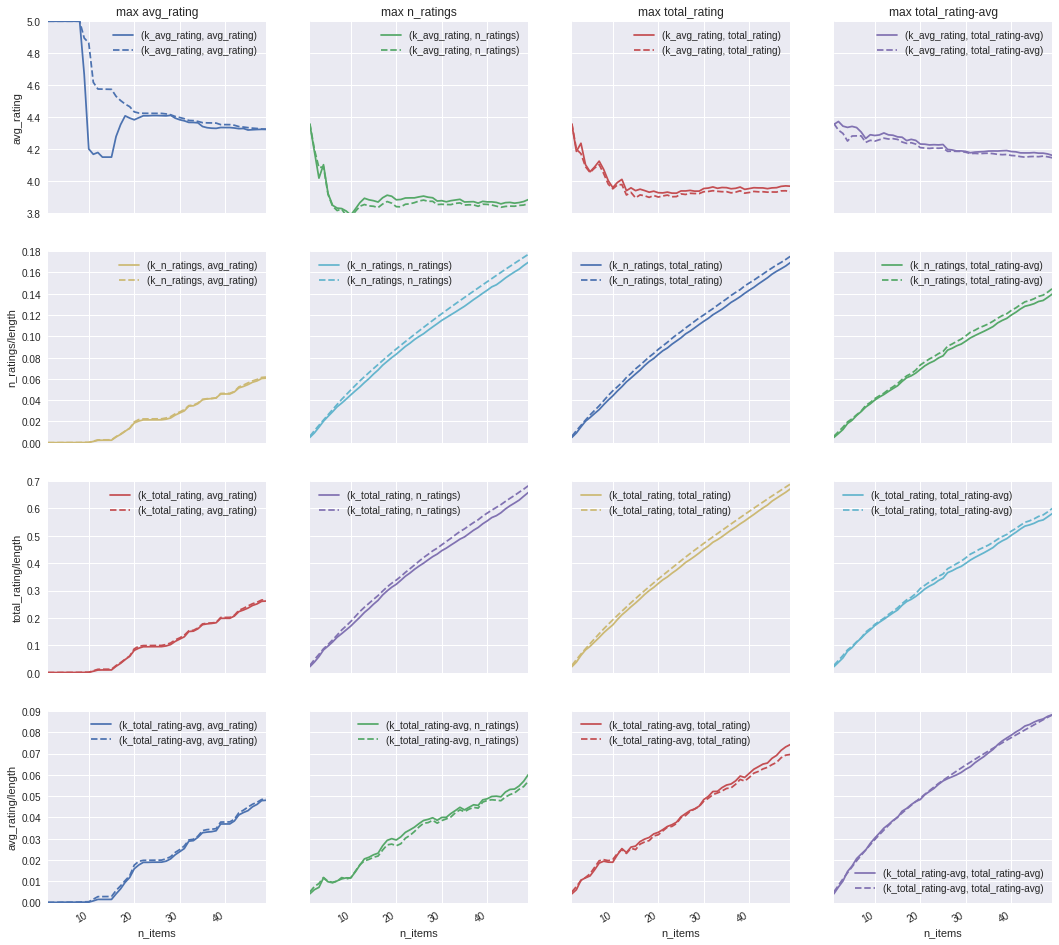

In [126]:
#strategy_df.info()
f, ax = plt.subplots(4,4,figsize=(18,18))
s_test.plot(subplots=True,figsize=(18,18),ax=ax,sharex=True,sharey=True);
s_train.plot(style="--",subplots=True,figsize=(18,18),ax=ax,sharex=True,sharey=True);
[a.set_ylim(3.8,5) for a in ax[0,:]]
[a.set_ylim(0,0.18) for a in ax[1,:]]
[a.set_ylim(0,0.7) for a in ax[2,:]]
[a.set_ylim(0,0.09) for a in ax[3,:]]
ax[0,0].set_title("max avg_rating")
ax[0,1].set_title("max n_ratings")
ax[0,2].set_title("max total_rating")
ax[0,3].set_title("max total_rating-avg")
ax[0,0].set_ylabel("avg_rating")
ax[1,0].set_ylabel("n_ratings/length")
ax[2,0].set_ylabel("total_rating/length")
ax[3,0].set_ylabel("avg_rating/length");

#strategy_df.T

In [150]:
#to be used with seaborn
strategy_melt=pd.melt(strategy_df,id_vars="n_items")
strategy_melt

,n_items,Strategy,KPI,Train/Test,value
0,1,avg_rating,k_avg_rating,df,5
1,2,avg_rating,k_avg_rating,df,5
2,3,avg_rating,k_avg_rating,df,5
3,4,avg_rating,k_avg_rating,df,5
4,5,avg_rating,k_avg_rating,df,5
5,6,avg_rating,k_avg_rating,df,5
6,7,avg_rating,k_avg_rating,df,5
7,8,avg_rating,k_avg_rating,df,5
8,9,avg_rating,k_avg_rating,df,4.89474
9,10,avg_rating,k_avg_rating,df,4.86364


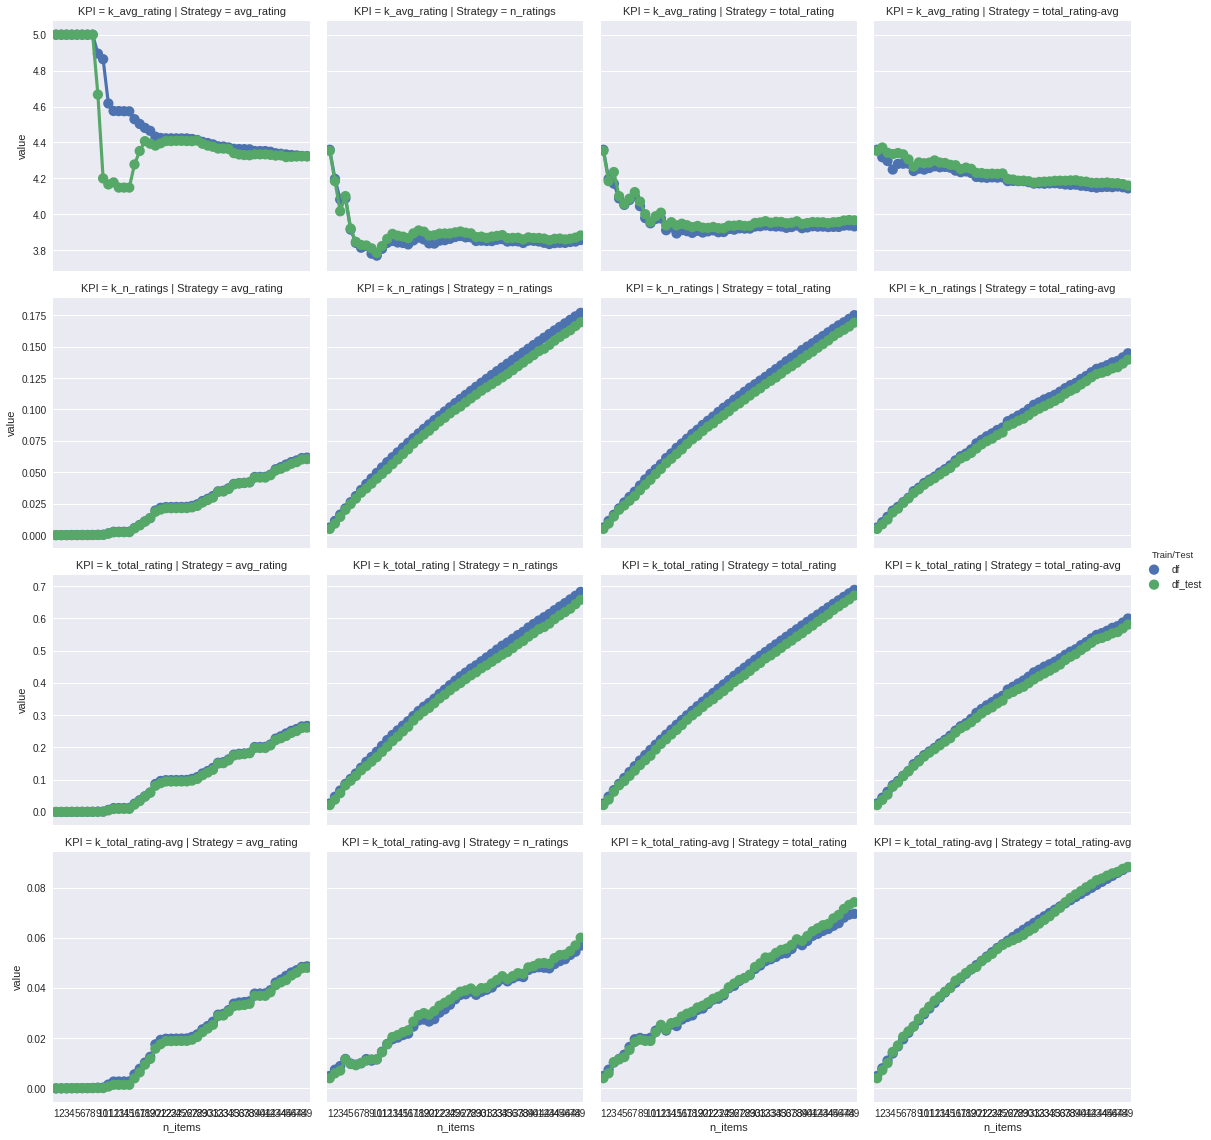

In [159]:
#f, ax = plt.subplots(4,4,figsize=(25,25))
import seaborn
fg = seaborn.factorplot(col="Strategy",row='KPI',hue="Train/Test",y="value",x="n_items", data=strategy_melt,
                       style="-",sharey="row",sharex=True) # hue='Mean', 


## 2nd strategy: Suggest similar items to the liked ones (same genre)
This is possible because we know a priori the genre of the movies (this is still non-collaborative).

I need two things:

- the best items per genre;
- the preferred genre(s) of each user.

Then I recommend to each user the most popular movies of his preferred genre(s).

### (2a) Recommendation per preferred genre
List_item_genre is a dictionary of dfs, each with items within a given genre

In [235]:
dict_item_genre={}
for i,g in enumerate(genres):                #loop over genres
    items_g_df=items[items[g]==1]
    dict_item_genre[g]=items_g_df.sort_values("total_rating",ascending=False)

For example, I can get Action:

In [236]:
dict_item_genre["Action"].head()

,name,date,?,link,unknown,Action,Adventure,Animation,Children's,Comedy,...,Romance,Sci-Fi,Thriller,War,Western,avg_rating,avg_rating-avg,n_ratings,total_rating,total_rating-avg
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,0,...,1,1,0,1,0,4.359504,0.831154,484.0,2110.0,402.2786
181,Return of the Jedi (1983),14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Return%20of%2...,0,1,1,0,0,0,...,1,1,0,1,0,4.011848,0.483498,422.0,1693.0,204.0363
174,Raiders of the Lost Ark (1981),01-Jan-1981,NaN,http://us.imdb.com/M/title-exact?Raiders%20of%...,0,1,1,0,0,0,...,0,0,0,0,0,4.247093,0.718743,344.0,1461.0,247.2476
127,"Godfather, The (1972)",01-Jan-1972,NaN,"http://us.imdb.com/M/title-exact?Godfather,%20...",0,1,0,0,0,0,...,0,0,0,0,0,4.258824,0.730474,340.0,1448.0,248.3610
300,Air Force One (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Air+Force+One...,0,1,0,0,0,0,...,0,0,1,0,0,3.656250,0.127900,352.0,1287.0,45.0208


... and all items within are of genre Action.

Now each user gets a score of how much he likes / watches each genre.

I will stick with total_score as KPI.

In [282]:
df_user_genre=pd.DataFrame(index=users.index,columns=genres)
for i,g in enumerate(genres):                     #loop over genres again
    items_g=list(items[items[g]==1].index)        #list of index of items of selected genre
    print(g)
    for u in users.index:                                 #loop over users
        df_user=df[df["user"]==u]
        df_user_genre.loc[u,g]=df_user[df_user["item"].isin(items_g)]["rating"].sum()

unknown
Action
Adventure
Animation
Children's
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western


This is the result:

In [283]:
df_user_genre.head()

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,,,,,,,,,,,,,,,,,,,
1,0,95,42,25,32,174,37,24,223,3,5,13,13,14,92,79,89,43,4
2,0,17,4,4,8,33,24,0,91,0,5,3,3,8,53,3,33,6,0
3,0,17,10,0,0,20,12,5,39,0,2,3,4,15,9,17,22,9,0
4,0,22,9,0,0,10,14,5,15,0,0,0,5,13,3,11,24,4,0
5,0,103,69,36,33,127,17,0,34,0,0,39,26,7,23,75,21,27,1


19

In [309]:
np.array(df_user_genre.loc[1]).dot(np.array(items.loc[1][genres]/i_g_sum))

77.0

Finally, I find the preferred genre of each user and suggest the best movies there

In [287]:
rec_items_list=(1,5,10,20,30,40,50)
strategy2_df=pd.DataFrame(index=rec_items_list,columns=data_sets,data=0)
for i in rec_items_list:                               #number of items to recommend
    print("N.Items",i)
    for u in users.index:
        #print(u)
        df_user=df[df["user"]==u]
        df_user_test=df_test[df_test["user"]==u]

        preferred_genre=df_user_genre.loc[u].argmax()
        items_sorted=dict_item_genre[preferred_genre]["total_rating"]         #sorted items in genre  
        rec_items=items_sorted[:i]                         #choose the first i items
        rec_items_index=rec_items.index                    #get their index
    
        for d in data_sets:                            #the train/test datasets
            if (d=="df_test"):
                    rec =df_user_test[df_user_test["item"].isin(rec_items_index)]    #find them in the test set
                    length=len(df_test)
                    #print(d)
            if (d=="df"):   
                    rec=df_user[df_user["item"].isin(rec_items_index)]              #find them also in the train set 
                    length=len(df)

            strategy2_df.loc[i,d]+=rec.rating.sum() #/length


#I normalize to compare train and test   
strategy2_df["df"]/=len(df)
strategy2_df["df_test"]/=len(df_test)   

N.Items 1
N.Items 5
N.Items 10
N.Items 20
N.Items 30
N.Items 40
N.Items 50


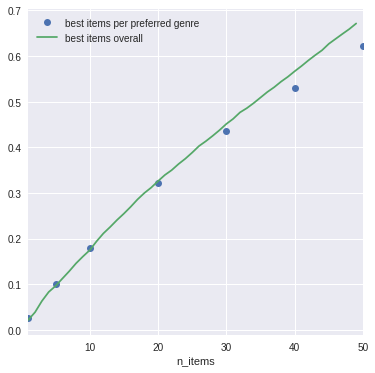

In [288]:
f, ax = plt.subplots(1,1,figsize=(6,6))
strategy2_df["df_test"].plot(ax=ax,label="best items per preferred genre", style="o")
strategy_df["total_rating"]["k_total_rating"]["df_test"].plot(ax=ax,label="best items overall")
ax.legend();

We don't really gain much, and we lose for a lot of items, because we reach the end of the list fast.

### (2b) Weighted recommendation preferred genres / best items

Here I normalize the genres for each item so they sum to 1.

In [514]:
items["sum_genres"]=items[genres].sum(axis=1)
genres_norm=[g+"_norm" for g in genres]
for g in genres:
    items[g+"_norm"]=np.sqrt(items[g]/items["sum_genres"])
items[genres_norm].head()

,unknown_norm,Action_norm,Adventure_norm,Animation_norm,Children's_norm,Comedy_norm,Crime_norm,Documentary_norm,Drama_norm,Fantasy_norm,Film-Noir_norm,Horror_norm,Musical_norm,Mystery_norm,Romance_norm,Sci-Fi_norm,Thriller_norm,War_norm,Western_norm
1,0.0,0.00000,0.00000,0.57735,0.57735,0.57735,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.0,0.57735,0.57735,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57735,0.0,0.0
3,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00000,0.0,0.0
4,0.0,0.57735,0.00000,0.00000,0.00000,0.57735,0.00000,0.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
5,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.57735,0.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57735,0.0,0.0


And I do the same for df_user_genre

In [515]:
df_user_genre["sum_ratings"]=df_user_genre[genres].sum(axis=1)
genres_norm=[g+"_norm" for g in genres]
for g in genres:
    df_user_genre[g+"_norm"]=(df_user_genre[g]/df_user_genre["sum_ratings"])**(0.5)
df_user_genre[genres_norm]

,unknown_norm,Action_norm,Adventure_norm,Animation_norm,Children's_norm,Comedy_norm,Crime_norm,Documentary_norm,Drama_norm,Fantasy_norm,Film-Noir_norm,Horror_norm,Musical_norm,Mystery_norm,Romance_norm,Sci-Fi_norm,Thriller_norm,War_norm,Western_norm
0,,,,,,,,,,,,,,,,,,,
1,0,0.307148,0.204225,0.157563,0.178263,0.415681,0.191684,0.15438,0.470585,0.0545816,0.0704645,0.113621,0.113621,0.11791,0.302259,0.280091,0.29729,0.206642,0.0630253
2,0,0.240056,0.116445,0.116445,0.164677,0.334461,0.28523,0,0.555405,0,0.130189,0.100844,0.100844,0.164677,0.423864,0.100844,0.334461,0.142615,0
3,0,0.303959,0.233126,0,0,0.32969,0.255377,0.164845,0.460387,0,0.104257,0.127688,0.147442,0.28552,0.221163,0.303959,0.345782,0.221163,0
4,0,0.403687,0.258199,0,0,0.272166,0.322031,0.19245,0.333333,0,0,0,0.19245,0.310316,0.149071,0.28545,0.421637,0.172133,0
5,0,0.401798,0.328862,0.237542,0.227429,0.446161,0.163235,0,0.23085,0,0,0.247242,0.201872,0.104746,0.189869,0.342863,0.181426,0.205718,0.0395904
6,0,0.264993,0.247221,0.180305,0.228069,0.426679,0.207154,0,0.470177,0.0721218,0.13002,0.101996,0.21027,0.169141,0.322539,0.161269,0.239201,0.161269,0.139663
7,0,0.316132,0.237338,0.115435,0.198419,0.31421,0.201448,0.06961,0.456463,0.0738325,0.0778263,0.243635,0.192217,0.147665,0.250982,0.267342,0.311305,0.242389,0.137027
8,0,0.538516,0.382971,0,0.1,0.191485,0.270801,0,0.264575,0,0,0,0,0.1,0.208167,0.369685,0.33665,0.163299,0.208167
9,0,0.3371,0.3371,0,0,0.408248,0,0,0.379393,0,0,0.194625,0,0,0.460566,0.261116,0.246183,0.288675,0


In [516]:
#items[genres_norm+["total_rating"]]
df_item_genre=items[genres_norm+["total_rating"]]
#df_user_genre[genres_norm]


In [517]:
df_item_genre=items[genres_norm]
print(df_item_genre.shape)
print(df_user_genre[genres_norm].shape)

(1682, 19)
(943, 19)


In [518]:
array_user_item=np.array(df_user_genre[genres_norm]).dot(np.array(df_item_genre).T)
#df_user_genre.shape

This is n_users*n_items large, so should be avoided, but let's do an exception (it should be done user by user, but then it would be slow):

In [519]:
df_user_item=pd.DataFrame(array_user_item,index=users.index,columns=items.index)
print(df_user_item.min().min())
print(df_user_item.max().max())

0.0
0.955636773967


It describes how "similar" an item is to one user's likings, according to the item's genre and to the user ratings of previous movies of the same genre

In [520]:
strategy3_df=pd.DataFrame(index=rec_items_list,columns=data_sets,data=0)
for u in users.index:
    print(u)
    df_user=df[df["user"]==u]
    df_user_test=df_test[df_test["user"]==u]

    #how much the preferred genres of the user coincide with the genre of the suggested movie
    df_user_item_u=df_user_item.loc[[u,]].T                #overlaps of given user with all items
    df_user_item_u["total_rating"]=items["total_rating"]   #I add the total rating of the items

    df_user_item_u["weighted_rating"]= (df_user_item_u[u])**(0.5)*df_user_item_u["total_rating"] #I multiply the two
    items_sorted=df_user_item_u.sort_values(by="weighted_rating",ascending=False)      
        
    for i in rec_items_list:                               #number of items to recommend
        #print("N.Items",i)
        rec_items=items_sorted[:i]                         #choose the first i items
        if(i==1): print(items.loc[rec_items.index]["name"])
        rec_items_index=rec_items.index                    #get their index
    
        for d in data_sets:                            #the train/test datasets
            if (d=="df_test"):
                    rec =df_user_test[df_user_test["item"].isin(rec_items_index)]    #find them in the test set
                    length=len(df_test)
                    #print(d)
            if (d=="df"):   
                    rec=df_user[df_user["item"].isin(rec_items_index)]              #find them also in the train set 
                    length=len(df)

            strategy3_df.loc[i,d]+=rec.rating.sum() #/length


#I normalize to compare train and test   
strategy3_df["df"]/=len(df)
strategy3_df["df_test"]/=len(df_test)  

1
50    Star Wars (1977)
Name: name, dtype: object
2
50    Star Wars (1977)
Name: name, dtype: object
3
50    Star Wars (1977)
Name: name, dtype: object
4
50    Star Wars (1977)
Name: name, dtype: object
5
50    Star Wars (1977)
Name: name, dtype: object
6
50    Star Wars (1977)
Name: name, dtype: object
7
50    Star Wars (1977)
Name: name, dtype: object
8
50    Star Wars (1977)
Name: name, dtype: object
9
50    Star Wars (1977)
Name: name, dtype: object
10
50    Star Wars (1977)
Name: name, dtype: object
11
50    Star Wars (1977)
Name: name, dtype: object
12
50    Star Wars (1977)
Name: name, dtype: object
13
50    Star Wars (1977)
Name: name, dtype: object
14
50    Star Wars (1977)
Name: name, dtype: object
15
50    Star Wars (1977)
Name: name, dtype: object
16
50    Star Wars (1977)
Name: name, dtype: object
17
50    Star Wars (1977)
Name: name, dtype: object
18
50    Star Wars (1977)
Name: name, dtype: object
19
50    Star Wars (1977)
Name: name, dtype: object
20
50    Star Wars (1

Name: name, dtype: object
161
50    Star Wars (1977)
Name: name, dtype: object
162
50    Star Wars (1977)
Name: name, dtype: object
163
50    Star Wars (1977)
Name: name, dtype: object
164
50    Star Wars (1977)
Name: name, dtype: object
165
50    Star Wars (1977)
Name: name, dtype: object
166
50    Star Wars (1977)
Name: name, dtype: object
167
50    Star Wars (1977)
Name: name, dtype: object
168
50    Star Wars (1977)
Name: name, dtype: object
169
50    Star Wars (1977)
Name: name, dtype: object
170
50    Star Wars (1977)
Name: name, dtype: object
171
50    Star Wars (1977)
Name: name, dtype: object
172
100    Fargo (1996)
Name: name, dtype: object
173
50    Star Wars (1977)
Name: name, dtype: object
174
50    Star Wars (1977)
Name: name, dtype: object
175
50    Star Wars (1977)
Name: name, dtype: object
176
50    Star Wars (1977)
Name: name, dtype: object
177
50    Star Wars (1977)
Name: name, dtype: object
178
50    Star Wars (1977)
Name: name, dtype: object
179
50    Star Wars (19

Name: name, dtype: object
319
50    Star Wars (1977)
Name: name, dtype: object
320
50    Star Wars (1977)
Name: name, dtype: object
321
50    Star Wars (1977)
Name: name, dtype: object
322
50    Star Wars (1977)
Name: name, dtype: object
323
50    Star Wars (1977)
Name: name, dtype: object
324
50    Star Wars (1977)
Name: name, dtype: object
325
50    Star Wars (1977)
Name: name, dtype: object
326
50    Star Wars (1977)
Name: name, dtype: object
327
50    Star Wars (1977)
Name: name, dtype: object
328
50    Star Wars (1977)
Name: name, dtype: object
329
50    Star Wars (1977)
Name: name, dtype: object
330
50    Star Wars (1977)
Name: name, dtype: object
331
50    Star Wars (1977)
Name: name, dtype: object
332
50    Star Wars (1977)
Name: name, dtype: object
333
50    Star Wars (1977)
Name: name, dtype: object
334
50    Star Wars (1977)
Name: name, dtype: object
335
50    Star Wars (1977)
Name: name, dtype: object
336
50    Star Wars (1977)
Name: name, dtype: object
337
50    Star Wars 

50    Star Wars (1977)
Name: name, dtype: object
477
50    Star Wars (1977)
Name: name, dtype: object
478
50    Star Wars (1977)
Name: name, dtype: object
479
50    Star Wars (1977)
Name: name, dtype: object
480
50    Star Wars (1977)
Name: name, dtype: object
481
50    Star Wars (1977)
Name: name, dtype: object
482
50    Star Wars (1977)
Name: name, dtype: object
483
50    Star Wars (1977)
Name: name, dtype: object
484
50    Star Wars (1977)
Name: name, dtype: object
485
50    Star Wars (1977)
Name: name, dtype: object
486
50    Star Wars (1977)
Name: name, dtype: object
487
50    Star Wars (1977)
Name: name, dtype: object
488
50    Star Wars (1977)
Name: name, dtype: object
489
50    Star Wars (1977)
Name: name, dtype: object
490
50    Star Wars (1977)
Name: name, dtype: object
491
100    Fargo (1996)
Name: name, dtype: object
492
50    Star Wars (1977)
Name: name, dtype: object
493
50    Star Wars (1977)
Name: name, dtype: object
494
50    Star Wars (1977)
Name: name, dtype: object


50    Star Wars (1977)
Name: name, dtype: object
634
50    Star Wars (1977)
Name: name, dtype: object
635
50    Star Wars (1977)
Name: name, dtype: object
636
50    Star Wars (1977)
Name: name, dtype: object
637
50    Star Wars (1977)
Name: name, dtype: object
638
50    Star Wars (1977)
Name: name, dtype: object
639
50    Star Wars (1977)
Name: name, dtype: object
640
50    Star Wars (1977)
Name: name, dtype: object
641
50    Star Wars (1977)
Name: name, dtype: object
642
50    Star Wars (1977)
Name: name, dtype: object
643
50    Star Wars (1977)
Name: name, dtype: object
644
50    Star Wars (1977)
Name: name, dtype: object
645
50    Star Wars (1977)
Name: name, dtype: object
646
50    Star Wars (1977)
Name: name, dtype: object
647
50    Star Wars (1977)
Name: name, dtype: object
648
50    Star Wars (1977)
Name: name, dtype: object
649
50    Star Wars (1977)
Name: name, dtype: object
650
50    Star Wars (1977)
Name: name, dtype: object
651
100    Fargo (1996)
Name: name, dtype: object


50    Star Wars (1977)
Name: name, dtype: object
789
50    Star Wars (1977)
Name: name, dtype: object
790
50    Star Wars (1977)
Name: name, dtype: object
791
50    Star Wars (1977)
Name: name, dtype: object
792
50    Star Wars (1977)
Name: name, dtype: object
793
50    Star Wars (1977)
Name: name, dtype: object
794
50    Star Wars (1977)
Name: name, dtype: object
795
50    Star Wars (1977)
Name: name, dtype: object
796
50    Star Wars (1977)
Name: name, dtype: object
797
50    Star Wars (1977)
Name: name, dtype: object
798
50    Star Wars (1977)
Name: name, dtype: object
799
50    Star Wars (1977)
Name: name, dtype: object
800
50    Star Wars (1977)
Name: name, dtype: object
801
50    Star Wars (1977)
Name: name, dtype: object
802
50    Star Wars (1977)
Name: name, dtype: object
803
50    Star Wars (1977)
Name: name, dtype: object
804
50    Star Wars (1977)
Name: name, dtype: object
805
50    Star Wars (1977)
Name: name, dtype: object
806
50    Star Wars (1977)
Name: name, dtype: obje

50    Star Wars (1977)
Name: name, dtype: object


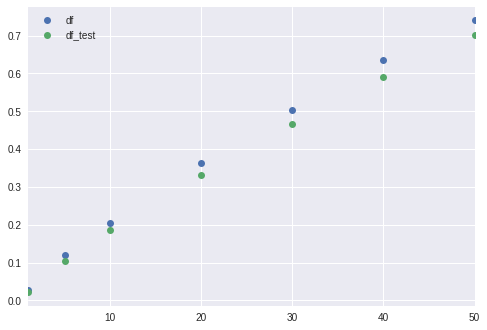

In [522]:
strategy3_df.plot(style="o")

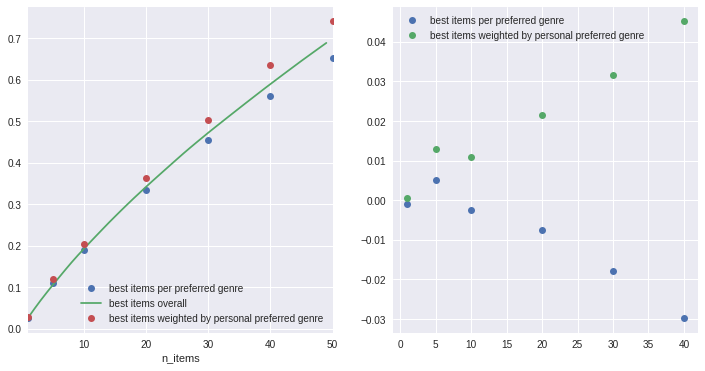

In [523]:
#train set
f, ax = plt.subplots(1,2,figsize=(12,6))
strategy2_df["df"].plot(ax=ax[0],label="best items per preferred genre", style="o")
strategy_df["total_rating"]["k_total_rating"]["df"].plot(ax=ax[0],label="best items overall")
strategy3_df["df"].plot(ax=ax[0],label="best items weighted by personal preferred genre", style="o")
ax[0].legend();

strategy1_df=strategy_df["total_rating"]["k_total_rating"].loc[strategy2_df.index]
ax[1].plot(rec_items_list,strategy2_df["df"]-strategy1_df["df"],"o",label="best items per preferred genre")
ax[1].plot(rec_items_list,strategy3_df["df"]-strategy1_df["df"],"o",label="best items weighted by personal preferred genre")
ax[1].legend()

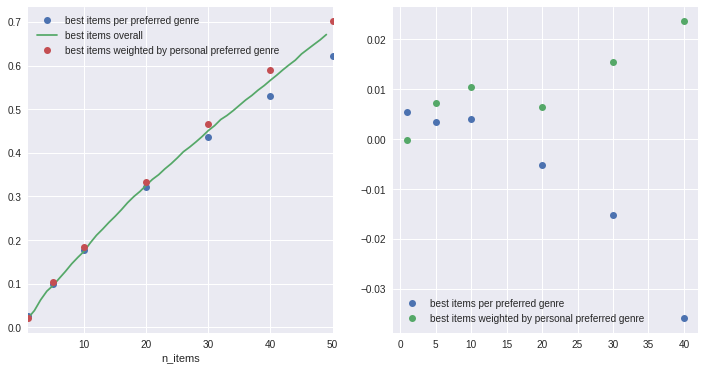

In [524]:
#test set 
f, ax = plt.subplots(1,2,figsize=(12,6))
strategy2_df["df_test"].plot(ax=ax[0],label="best items per preferred genre", style="o")
strategy_df["total_rating"]["k_total_rating"]["df_test"].plot(ax=ax[0],label="best items overall")
strategy3_df["df_test"].plot(ax=ax[0],label="best items weighted by personal preferred genre", style="o")
ax[0].legend();

strategy1_df=strategy_df["total_rating"]["k_total_rating"].loc[strategy2_df.index]
ax[1].plot(rec_items_list,strategy2_df["df_test"]-strategy1_df["df_test"],"o",label="best items per preferred genre")
ax[1].plot(rec_items_list,strategy3_df["df_test"]-strategy1_df["df_test"],"o",label="best items weighted by personal preferred genre")
ax[1].legend()

We gain a little

## 3rd Strategy: Collaborative filtering

### Build sparse matrix with ratings, dim=users * items

In [528]:
import scipy.sparse

#these are the ratings, read as a sparse matrix, with index starting from zero, hence the -1
user_item=scipy.sparse.coo_matrix((np.array(df["rating"]),(np.array(df["user"]-1),np.array(df["item"]-1))))

#these are if there is a rating
user_item_n=scipy.sparse.coo_matrix((np.ones(len(df)),(np.array(df["user"]-1),np.array(df["item"]-1))))

print(user_item.count_nonzero())
print(user_item_n.count_nonzero())
print(user_item.shape)
print(user_item_n.shape)

80000
80000
(943, 1682)
(943, 1682)


In [529]:
user_user=(user_item.dot(user_item.T)).toarray()
item_item=(user_item.T.dot(user_item)).toarray()
#user_user_n=(user_item_n.dot(user_item_n.T)).toarray()
#item_item_n=(user_item_n.T.dot(user_item_n)).toarray()

In [530]:
item_item_row_max=np.sqrt(item_item.max(axis=0))
item_item_norm=np.nan_to_num(item_item/item_item_row_max[:,np.newaxis]/item_item_row_max[np.newaxis,:])
user_user_row_max=np.sqrt(user_user.max(axis=0))
user_user_norm=np.nan_to_num(user_user/user_user_row_max[:,np.newaxis]/user_user_row_max[np.newaxis,:])


/home/baruselli/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


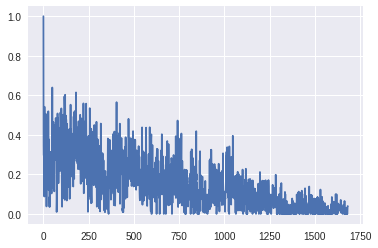

In [532]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(item_item_norm[0])

In [ ]:
#from datetime import datetime
#datetime.fromtimestamp(train1.time[0])

In [ ]:
sorting=item_item[0].argsort()[-10:]
items.iloc[sorting]

And I plot the average score as a function of the verified raccomendations (the ones present in the test set)/ the total possible raccomendations

NameError: name 'n_reccs_train' is not defined

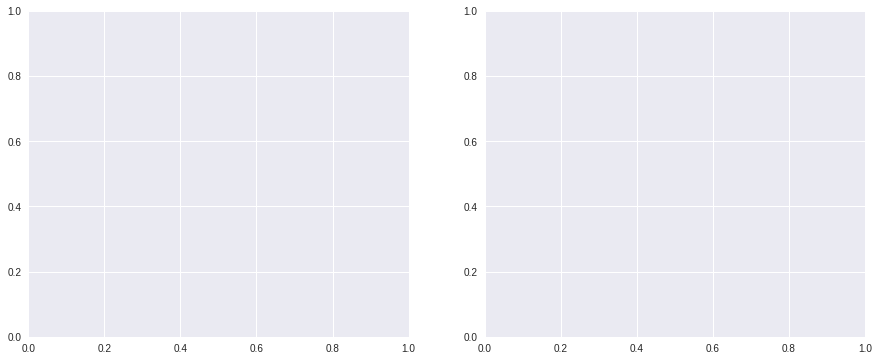

In [160]:
f, ax = plt.subplots(1,2,figsize=(15,6))

#ax[0].plot(rec_items_list,avg_rat)
#ax[0].plot(rec_items_list,np.full(len(rec_items_list),avg))
#ax[1].plot(rec_items_list,n_reccs)
ax[0].plot(np.array(n_reccs_train)/max(n_reccs_train),avg_rat_train, "r--",label="recommendation_train")
ax[0].plot(np.array(n_reccs)/max(n_reccs),avg_rat, "b", label="recommendation_test")
ax[0].axhline(avg,label="avg train set",c="r")
ax[0].axhline(avg_test,label="avg test set",c="b")
ax[0].set_xlabel("fraction of possible recommendations")
ax[0].set_ylabel("avg rating")
ax[0].legend();


ax[1].plot(np.array(rec_items_list),avg_rat_train, "r--",label="recommendation_train")
ax[1].plot(np.array(rec_items_list),avg_rat, "b",label="recommendation_test")
ax[1].axhline(avg,label="avg train set",c="r")
ax[1].axhline(avg_test,label="avg test set",c="b")
ax[1].set_xlabel("recommended items per user")
ax[1].set_ylabel("avg rating")
ax[1].legend();